In [11]:
from sklearn.datasets import fetch_openml
from manualMLP import NeuralMLP
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

print(X.shape)
print(y.shape)

# normalize X to have features between -1 and 1 - this  stabilizes gradient based updates just like normalizing
# but -1 to 1 works better with pixels typically
# X ranges from 0 to 255 (8-bit encoding for B/W images)
X = ((X / 255.) - 0.5) *2

(70000, 784)
(70000,)


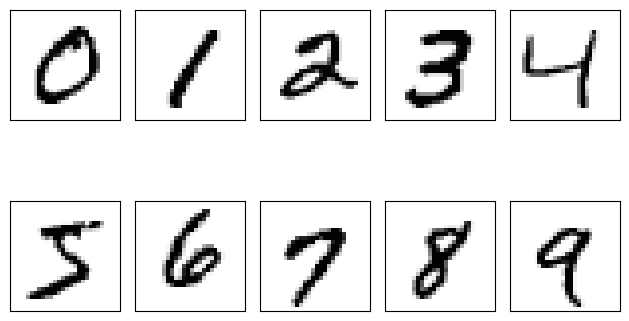

This is just one example - people write each number with different handwriting, and different styles


In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()

for i in range(10):
    img = X[y==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

print("This is just one example - people write each number with different handwriting, and different styles")

In [9]:
# We have 70,000 images - split 10000 away for testing
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=10000, random_state=123, stratify=y
)
# Split 5000 away for validation, and keep the rest for training
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp
)

In [10]:
model = NeuralMLP(num_features=28*28, num_hidden=50, num_classes=10)

In [12]:
num_epochs = 50
minibatch_size = 100

def generate_minibatch(X, y, batch_size=minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - batch_size + 1, batch_size):
        batch_idx = indices[start_idx:start_idx + batch_size]
        yield X[batch_idx], y[batch_idx]

In [ ]:
def mse(targets, probs, n_labels=10):
    onehot_targets = model.int_to_onehot()